In [1]:
# Import 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
from geopy import distance
from config import gkey
import numpy as np
import time
import gmaps
import gmaps.datasets
from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


In [3]:
# Reading in two csv files; 2019 and 2020. 
# Each csv file was generated by merging each years Q2 data files, 
# consisting of April, May, and June. 
# Bike 2019 is located on a local drive due to size uploading limitations.

Bike_2019 = pd.read_csv("Q2_2019_df.csv")
Bike_2020 = pd.read_csv("q2_2020_df.csv")
#test = pd.read_csv("201904-capitalbikeshare-tripdata.csv")
#bike06 =pd.read_csv("202006-capitalbikeshare-tripdata 2.csv")
#test.head()
#test.info()
#print(Bike_2020.head())
Bike_2019

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,4/1/19 0:03,4/1/19 0:08,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,4/1/19 0:07,4/1/19 0:15,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,4/1/19 0:09,4/1/19 0:15,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,4/1/19 0:10,4/1/19 0:19,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,4/1/19 0:10,4/1/19 0:37,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member
...,...,...,...,...,...,...,...,...,...
1035835,733,6/30/19 23:57,7/1/19 0:09,31609,Maine Ave & 7th St SW,31610,Eastern Market / 7th & North Carolina Ave SE,W22399,Casual
1035836,5127,6/30/19 23:58,7/1/19 1:23,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20536,Casual
1035837,5145,6/30/19 23:58,7/1/19 1:24,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20531,Casual
1035838,331,6/30/19 23:59,7/1/19 0:04,31610,Eastern Market / 7th & North Carolina Ave SE,31612,D St & Maryland Ave NE,W00795,Member


In [4]:
# Renaming Bike 2020 Columns 
Bike_2020.rename(columns={"started_at": "Start date", "ended_at": "End date", "start_station_name": "Start station","end_station_name":"End station", "member_casual": "Member type"},inplace=True)
Bike_2020.head(2)

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Member type,is_equity
0,495C10604A58ACA9,docked_bike,4/27/20 10:33,4/27/20 10:53,4th & M St SW,21.0,New York Ave & 15th St NW,124.0,38.8767,-77.0178,38.8990,-77.0334,member,NaN
1,08A5138C88D182A5,docked_bike,4/27/20 11:20,4/27/20 11:42,17th & K St NW,100.0,4th & M St SW,21.0,38.9028,-77.0386,38.8767,-77.0178,member,NaN


In [5]:
#Bike_2020.drop(['ride_id','rideable_type', 'start_station_id', 'end_station_id', 'is_equity'], axis=1, inplace=True)

In [6]:
# Reformat Bike 2020 time/date in "Start Date" column, 
# to get a new column for "day_of_week"

Bike_2020['Start date'] = pd.to_datetime(Bike_2020['Start date'])
Bike_2020['End date'] = pd.to_datetime(Bike_2020['End date'])
Bike_2020['day_of_week'] = Bike_2020['Start date'].dt.day_name()
Bike_2020['year'] = Bike_2020['Start date'].dt.year
Bike_2020['year']=pd.to_numeric(Bike_2020['year'])
Bike_2020.head()

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Member type,is_equity,day_of_week,year
0,495C10604A58ACA9,docked_bike,2020-04-27 10:33:00,2020-04-27 10:53:00,4th & M St SW,21.0,New York Ave & 15th St NW,124.0,38.8767,-77.0178,38.8990,-77.0334,member,NaN,Monday,2020
1,08A5138C88D182A5,docked_bike,2020-04-27 11:20:00,2020-04-27 11:42:00,17th & K St NW,100.0,4th & M St SW,21.0,38.9028,-77.0386,38.8767,-77.0178,member,NaN,Monday,2020
2,505E308BDCA9C792,docked_bike,2020-04-27 09:45:00,2020-04-27 09:54:00,1st & M St SE,578.0,4th & M St SW,21.0,38.8769,-77.0061,38.8767,-77.0178,member,NaN,Monday,2020
3,D3436FC6CCF04110,docked_bike,2020-04-14 13:16:00,2020-04-14 13:28:00,11th & Kenyon St NW,15.0,Thomas Circle,178.0,38.9295,-77.0278,38.9059,-77.0325,casual,NaN,Tuesday,2020
4,37B8457C89257BD5,docked_bike,2020-04-19 20:42:00,2020-04-19 20:51:00,13th & H St NE,97.0,Eastern Market / 7th & North Carolina Ave SE,96.0,38.9004,-76.9883,38.8870,-76.9968,member,NaN,Sunday,2020


In [7]:
# calculates the bike ride/rental duration by subtracting end time from start time

Bike_2020['Duration']= (Bike_2020['End date'] - Bike_2020['Start date']).dt.total_seconds()
Bike_2020['Duration']= Bike_2020[['Duration']].astype(int)
Bike_2020.sample(5)

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Member type,is_equity,day_of_week,year,Duration
141200,F7E2C6AFDF1450CD,docked_bike,2020-05-07 19:08:00,2020-05-07 19:23:00,18th St & Pennsylvania Ave NW,180.0,Columbia & Ontario Rd NW,517.0,38.8997,-77.0415,38.9241,-77.0408,member,False,Thursday,2020,900
190010,D7A71724DD9ECCCF,docked_bike,2020-05-10 13:52:00,2020-05-10 14:12:00,Connecticut Ave & R St NW,528.0,Jefferson Memorial,187.0,38.9126,-77.0456,38.8798,-77.0374,member,False,Sunday,2020,1200
60206,93F54384E76F9CCD,docked_bike,2020-04-20 22:39:00,2020-04-20 22:45:00,14th & Belmont St NW,81.0,14th & Newton St NW,575.0,38.9211,-77.0319,38.9320,-77.0330,casual,NaN,Monday,2020,360
127248,68E5C024D0B2ACAD,docked_bike,2020-05-25 08:39:00,2020-05-25 08:49:00,Connecticut & Nebraska Ave NW,133.0,Connecticut & Nebraska Ave NW,133.0,38.9550,-77.0700,38.9550,-77.0700,member,False,Monday,2020,600
116578,511B8719EC5A7A6F,docked_bike,2020-05-23 16:21:00,2020-05-23 16:41:00,12th & L St NW,267.0,NaN,NaN,38.9038,-77.0284,NaN,NaN,casual,False,Saturday,2020,1200


In [8]:
### outliers for DURATION for Bike 2019 and 2020

Bike_2019 = Bike_2019[(Bike_2019['Duration']>=60)]
Bike_2020 = Bike_2020[(Bike_2020['Duration']>=60)]
# Removing outliers
q1 = Bike_2019['Duration'].quantile(0.25)
q3 = Bike_2019['Duration'].quantile(0.75)

iqr = q3 - q1

Bike_2019 = Bike_2019[~((Bike_2019['Duration'] < (q1 - 1.5 * iqr)) \
         |(Bike_2019['Duration'] > (q3 + 1.5 * iqr)))].reset_index(drop=True)

q1_20 = Bike_2020['Duration'].quantile(0.25)
q3_20 = Bike_2020['Duration'].quantile(0.75)



Bike_2020= Bike_2020[~((Bike_2020['Duration'] < (q1 - 1.5 * iqr)) \
         |Bike_2020['Duration'] > (q3 + 1.5 * iqr))].reset_index(drop=True)



In [9]:
Bike_2019.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
713173,386,6/7/19 20:14,6/7/19 20:20,31100,19th St & Pennsylvania Ave NW,31298,15th & M St NW,W01152,Member
361792,316,5/5/19 12:43,5/5/19 12:48,31031,15th St & N Scott St,31015,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,W00012,Member
937659,1128,6/28/19 19:06,6/28/19 19:25,31651,11th & Park Rd NW,31257,22nd & I St NW / Foggy Bottom,W21766,Member
814105,652,6/17/19 17:27,6/17/19 17:38,31239,Rhode Island & Connecticut Ave NW,31111,10th & U St NW,W21953,Member
556964,562,5/24/19 16:43,5/24/19 16:52,31624,North Capitol St & F St NW,31505,Eckington Pl & Q St NE,W22676,Member


<AxesSubplot:xlabel='Duration'>

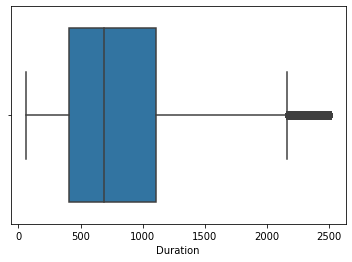

In [10]:
# outliers
sns.boxplot(x=Bike_2019['Duration'])

In [ ]:
#print(Bike_2019[Bike_2019['Duration']>2000])

In [11]:
#stations = test["Start station"].unique()
stations = Bike_2019["Start station"].unique()

In [12]:
for i in stations:
    Start_station = [i][0]
    #print (Start_station)
    #End_station = row['End station']

In [ ]:
gmaps = GoogleMaps(gkey)
#test['lng'] = `""
#test['lat'] = ""
url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"
query_url=f'{url}query=4th & East Capitol St NE&key={gkey}'
query_url2=f'{url}{Start_station}={gkey}'
print(query_url)

In [ ]:
#### API loop to search for lat/lot no longer due to origina results saved as dataframe and merged into original 
#### files

# start_lat = []
# start_lng = []
# end_lat = []
# end_lng = []
# start_place = []
# end_place = []


# #for index, row in locs.iterrows():
# for i in stations:
#     try:
        
#         Start_station =[i][0]
#         #Start_station = row['Start station']
#         #End_station = row['End station']


#         response = requests.get(f'{url}query={Start_station}&key={gkey}').json()
#         #response_end = requests.get(f'{url}query={End_station}&key={gkey}').json()
#         results = response['results']
#         #results_end = response_end['results']
#         start_lat.append(results[0]['geometry']['location']['lat'])
#         start_lng.append(results[0]['geometry']['location']['lng'])
#         #locs['start_lat'] = (results[0]['geometry']['location']['lat'])
#         #locs['start_lng'] = (results[0]['geometry']['location']['lng'])
#         #locs['end_lat'] = (results_end[0]['geometry']['location']['lat'])
#         #locs['end_lng'] = (results_end[0]['geometry']['location']['lng'])
#         #end_lat.append(results_end[0]['geometry']['location']['lat'])
#         #end_lng.append(results_end[0]['geometry']['location']['lng'])
#         start_place.append(Start_station)
#         #end_place.append(End_station)
#         print (f' station name {Start_station}')
#     except:
#         print(f" this station{start_place} was not found")



In [ ]:
#print(results)
#print(results[0]['geometry']['location']['lat'])
#print(start_lat[0])
#print (locs)

In [ ]:
###already created cvs in line 11/12 to avoid api search

# places = {'Start station': start_place,
#          'start_lat': start_lat,
#          'start_lng': start_lng}
# places = pd.DataFrame.from_dict(places)
# places2 = places[["Start station", 'start_lat', 'start_lng']]
# places2 = places2.rename(columns={"Start station": "End station",
#                                  "start_lat" : "end_lat",
#                                  "start_lng": "end_lng"})
# places2.to_csv("end_stations.csv")
# places.to_csv("start_stations.csv")

In [13]:
## merged original api output into dataframes lat/lon for start and end locations
places = pd.read_csv("start_stations.csv", index_col=0)
places2 = pd.read_csv("end_stations.csv", index_col=0)
Bike_2019_merged = pd.merge(Bike_2019, places, how="inner", on="Start station")
Bike_2019_merged = pd.merge(Bike_2019_merged, places2, how="inner", on= "End station")
Bike_2019_merged.sample(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng
494606,1270,5/6/19 19:50,5/6/19 20:11,31638,1st & H St NW,31505,Eckington Pl & Q St NE,W20544,Member,38.964195,-77.502419,38.910760,-77.004893
522705,784,5/7/19 17:31,5/7/19 17:44,31200,Massachusetts Ave & Dupont Circle NW,31509,New Jersey Ave & R St NW,W20603,Member,38.918751,-77.059675,38.903223,-77.013992
861570,137,6/14/19 7:16,6/14/19 7:18,31004,Aurora Hills Cmty Ctr / 18th St & S Hayes St,31005,Pentagon City Metro / 12th St & S Hayes St,W23553,Member,38.857533,-77.059173,38.862708,-77.059885
666281,740,6/17/19 17:26,6/17/19 17:39,31260,23rd & E St NW,31227,13th St & New York Ave NW,W22489,Member,38.906263,-77.049683,38.858437,-77.092896
669713,677,6/20/19 7:59,6/20/19 8:11,31241,Thomas Circle,31225,C & O Canal & Wisconsin Ave NW,W23499,Member,38.905366,-77.032154,39.020086,-77.420798
849748,1850,5/22/19 11:52,5/22/19 12:23,31231,14th & D St NW / Ronald Reagan Building,31077,Iwo Jima Memorial / Meade & 14th St N,W23777,Member,38.917555,-77.032473,38.890436,-77.069721
159263,1031,5/2/19 17:09,5/2/19 17:26,31108,4th & M St SW,31619,Lincoln Park / 13th & East Capitol St NE,W00442,Member,38.887837,-77.017676,38.895141,-76.988019
843667,852,4/8/19 6:49,4/8/19 7:04,31249,Jefferson Memorial,31003,Crystal Dr & 15th St S,W24003,Member,38.881381,-77.036454,39.189988,-77.266944
371881,1102,5/20/19 15:12,5/20/19 15:31,31222,New York Ave & 15th St NW,31108,4th & M St SW,W23545,Member,39.330319,-77.613844,38.887837,-77.017676
129662,84,5/22/19 1:05,5/22/19 1:07,31634,3rd & Tingey St SE,31209,1st & N St SE,W22916,Member,38.992813,-77.422990,38.964195,-77.502419


In [14]:
# Reformat Bike 2019 time/date in "Start Date" column, to get a new column for "day_of_week"

Bike_2019_merged['Start date'] = pd.to_datetime(Bike_2019_merged['Start date'])
Bike_2019_merged['End date'] = pd.to_datetime(Bike_2019_merged['End date'])
Bike_2019_merged['day_of_week'] = Bike_2019_merged['Start date'].dt.day_name()
Bike_2019_merged.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week
23017,710,2019-06-22 19:29:00,2019-06-22 19:41:00,31641,2nd St & Massachusetts Ave NE,31264,6th St & Indiana Ave NW,W21816,Member,38.870102,-77.091272,38.908897,-77.019908,Saturday
450740,522,2019-05-17 12:39:00,2019-05-17 12:48:00,31639,2nd & G St NE,31621,4th & D St NW / Judiciary Square,W21941,Member,38.888419,-77.419324,38.887837,-77.017676,Friday
263759,1202,2019-04-22 17:55:00,2019-04-22 18:15:00,31014,Lynn St & 19th St North,31114,18th St & Wyoming Ave NW,W23415,Member,38.970646,-77.385822,38.903177,-77.041377,Monday
632877,293,2019-05-15 13:19:00,2019-05-15 13:24:00,31241,Thomas Circle,31245,7th & R St NW / Shaw Library,W24223,Member,38.905366,-77.032154,38.914932,-77.021604,Wednesday
556750,318,2019-05-25 07:28:00,2019-05-25 07:33:00,31108,4th & M St SW,31654,King Greenleaf Rec Center,W20921,Member,38.887837,-77.017676,38.875000,-77.012778,Saturday


In [15]:
# Extracts Bike 2019 distance traveled from 
# start_lat, start_lng, end_lat, end_lng, and created new column called "Distance Traveled"

def dist_from_coordinates(lat1, lon1, lat2, lon2):
    
    R = 6371  # Earth radius in km

#conversion to radians
    d_lat = np.radians(lat2-lat1)
    d_lon = np.radians(lon2-lon1)

    r_lat1 = np.radians(lat1)
    r_lat2 = np.radians(lat2)

#haversine formula
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

new_column = []                    #empty column for distance
for index,row in Bike_2019_merged.iterrows():
    lat1 = row['start_lat'] #first row of location.lat column here
    lon1 = row['start_lng'] #first row of location.long column here
    lat2 = row['end_lat'] #second row of location.lat column here
    lon2 = row['end_lng'] #second row of location.long column here
    value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
    new_column.append(value)   #append the empty list with distance values

Bike_2019_merged.insert(14,"Distance Traveled",new_column)

In [16]:
# rounds the ouput of distance traveled to 2 decimal places for Bike 2019 data 

Bike_2019_merged['Distance Traveled']= Bike_2019_merged['Distance Traveled'].round(2)

Bike_2019_merged

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled
0,313,2019-04-01 00:03:00,2019-04-01 00:08:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member,38.887837,-77.017676,48.842162,2.292766,Monday,6161.39
1,447,2019-04-01 19:35:00,2019-04-01 19:42:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W22518,Member,38.887837,-77.017676,48.842162,2.292766,Monday,6161.39
2,423,2019-04-03 20:38:00,2019-04-03 20:45:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W01440,Member,38.887837,-77.017676,48.842162,2.292766,Wednesday,6161.39
3,298,2019-04-03 23:58:00,2019-04-04 00:03:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W22313,Member,38.887837,-77.017676,48.842162,2.292766,Wednesday,6161.39
4,375,2019-04-04 19:40:00,2019-04-04 19:46:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W23620,Member,38.887837,-77.017676,48.842162,2.292766,Thursday,6161.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955021,1869,2019-06-22 22:19:00,2019-06-22 22:50:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W22788,Casual,38.871729,-77.229284,38.871729,-77.229284,Saturday,0.00
955022,820,2019-06-24 12:29:00,2019-06-24 12:43:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W21347,Member,38.871729,-77.229284,38.871729,-77.229284,Monday,0.00
955023,1447,2019-06-26 22:42:00,2019-06-26 23:06:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W00932,Casual,38.871729,-77.229284,38.871729,-77.229284,Wednesday,0.00
955024,1724,2019-06-29 00:48:00,2019-06-29 01:17:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W21347,Casual,38.871729,-77.229284,38.871729,-77.229284,Saturday,0.00


In [17]:
# Create new column for "year" in Bike 2019, by extracting year from start date column

Bike_2019_merged['year'] = Bike_2019_merged['Start date'].dt.year
Bike_2019_merged['year']=pd.to_numeric(Bike_2019_merged['year'])# convert year to interger
#Bike_2019_merged.to_csv('Bike_2019_merged.csv')
Bike_2019_merged.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year
111131,1319,2019-04-01 18:06:00,2019-04-01 18:28:00,31216,14th St & New York Ave NW,31610,Eastern Market / 7th & North Carolina Ave SE,W00141,Member,38.938678,-77.032722,38.886448,-76.996479,Monday,6.60,2019
172115,423,2019-06-07 09:09:00,2019-06-07 09:16:00,31218,L'Enfant Plaza / 7th & C St SW,31271,Constitution Ave & 2nd St NW/DOL,W00517,Member,38.883917,-77.025194,38.892014,-76.991533,Friday,3.05,2019
360056,369,2019-05-01 08:30:00,2019-05-01 08:36:00,31241,Thomas Circle,31212,21st & M St NW,W00887,Member,38.905366,-77.032154,39.137622,-77.715620,Wednesday,64.44,2019
293558,401,2019-04-16 19:08:00,2019-04-16 19:15:00,31232,7th & F St NW / National Portrait Gallery,31263,10th & K St NW,W23975,Member,38.914932,-77.021604,38.904994,-77.025760,Tuesday,1.16,2019
225902,1764,2019-06-29 13:41:00,2019-06-29 14:10:00,31215,Georgetown Harbor / 30th St NW,31628,1st & K St SE,W01285,Casual,38.901877,-77.060110,38.964195,-77.502419,Saturday,38.88,2019


In [18]:
Bike_2020.drop(["is_equity"], axis = 1, inplace =True)

In [19]:
# Extracts Bike 2020 distance traveled from 
# start_lat, start_lng, end_lat, end_lng, and created new column called "Distance Traveled"

def dist_from_coordinates(lat1, lon1, lat2, lon2):
    
    R = 6371  # Earth radius in km

#conversion to radians
    d_lat = np.radians(lat2-lat1)
    d_lon = np.radians(lon2-lon1)

    r_lat1 = np.radians(lat1)
    r_lat2 = np.radians(lat2)

#haversine formula
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

new_column = []                    #empty column for distance
for index,row in Bike_2020.iterrows():
    lat1 = row['start_lat'] #first row of location.lat column here
    lon1 = row['start_lng'] #first row of location.long column here
    lat2 = row['end_lat'] #second row of location.lat column here
    lon2 = row['end_lng'] #second row of location.long column here
    value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
    new_column.append(value)   #append value to new column empty list

Bike_2020.insert(12,"Distance Traveled",new_column)  
Bike_2020['Distance Traveled']= Bike_2020['Distance Traveled']

In [20]:
# Creaing Month Column for 2020 using "start date"

Bike_2020["Month"] = Bike_2020["Start date"].dt.month
Bike_2020['Month'] = Bike_2020['Month'].apply(lambda x: calendar.month_abbr[x])
Bike_2020.sample(5)

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,day_of_week,year,Duration,Month
18928,809EF85B4A31C74B,docked_bike,2020-04-27 19:39:00,2020-04-27 19:53:00,4th St & Madison Dr NW,451.0,1st & M St NE,65.0,38.890500,-77.017300,38.905700,-77.005600,1.970233,member,Monday,2020,840,Apr
273360,36C0B138C8ACEDFA,docked_bike,2020-06-26 17:51:00,2020-06-26 18:16:00,Connecticut Ave & Newark St NW / Cleveland Park,108.0,Friendship Blvd & Willard Ave,357.0,38.934267,-77.057979,38.961150,-77.088659,3.996861,member,Friday,2020,1500,Jun
68398,CBD154985E091A01,docked_bike,2020-04-02 18:21:00,2020-04-02 18:26:00,4th & M St SW,21.0,Maine Ave & 9th St SW,548.0,38.876700,-77.017800,38.880400,-77.025200,0.761309,member,Thursday,2020,300,Apr
383343,152B229AE5FA543D,docked_bike,2020-06-29 14:53:00,2020-06-29 15:08:00,Lynn St & 19th St North,114.0,34th & Water St NW,377.0,38.897315,-77.070993,38.903663,-77.067668,0.762257,casual,Monday,2020,900,Jun
355002,11AE5DC24F05E0D0,docked_bike,2020-06-22 13:48:00,2020-06-22 13:54:00,18th St & Wyoming Ave NW,76.0,Connecticut Ave & R St NW,528.0,38.918809,-77.041571,38.912644,-77.045640,0.770626,member,Monday,2020,360,Jun


In [21]:
# Creating Month Column for 2019 using "start date"

Bike_2019_merged["Month"] = Bike_2019_merged["Start date"].dt.month
Bike_2019_merged['Month'] = Bike_2019_merged['Month'].apply(lambda x: calendar.month_abbr[x])
Bike_2019_merged

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month
0,313,2019-04-01 00:03:00,2019-04-01 00:08:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member,38.887837,-77.017676,48.842162,2.292766,Monday,6161.39,2019,Apr
1,447,2019-04-01 19:35:00,2019-04-01 19:42:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W22518,Member,38.887837,-77.017676,48.842162,2.292766,Monday,6161.39,2019,Apr
2,423,2019-04-03 20:38:00,2019-04-03 20:45:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W01440,Member,38.887837,-77.017676,48.842162,2.292766,Wednesday,6161.39,2019,Apr
3,298,2019-04-03 23:58:00,2019-04-04 00:03:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W22313,Member,38.887837,-77.017676,48.842162,2.292766,Wednesday,6161.39,2019,Apr
4,375,2019-04-04 19:40:00,2019-04-04 19:46:00,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W23620,Member,38.887837,-77.017676,48.842162,2.292766,Thursday,6161.39,2019,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955021,1869,2019-06-22 22:19:00,2019-06-22 22:50:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W22788,Casual,38.871729,-77.229284,38.871729,-77.229284,Saturday,0.00,2019,Jun
955022,820,2019-06-24 12:29:00,2019-06-24 12:43:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W21347,Member,38.871729,-77.229284,38.871729,-77.229284,Monday,0.00,2019,Jun
955023,1447,2019-06-26 22:42:00,2019-06-26 23:06:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W00932,Casual,38.871729,-77.229284,38.871729,-77.229284,Wednesday,0.00,2019,Jun
955024,1724,2019-06-29 00:48:00,2019-06-29 01:17:00,32235,Merrifield Cinema & Merrifield Town Center,32235,Merrifield Cinema & Merrifield Town Center,W21347,Casual,38.871729,-77.229284,38.871729,-77.229284,Saturday,0.00,2019,Jun


In [22]:
Bike_2019_merged['Distance Traveled'].sort_values(ascending=True)

955025       0.00
795277       0.00
795276       0.00
795275       0.00
795274       0.00
           ...   
16792     7965.32
16793     7965.32
16794     7965.32
21176     7965.32
723654    7965.32
Name: Distance Traveled, Length: 955026, dtype: float64

In [ ]:
#sns.boxplot(x=test['Distance Traveled'])

In [23]:
### outliers for DISTANCE TRAVELED for Bike 2019 and 2020


Bike_2019_clean= Bike_2019_merged[(Bike_2019_merged['Distance Traveled']<=6000)]
Bike_2020_clean = Bike_2020[(Bike_2020['Distance Traveled']<=7)]
# Removing outliers
q1 = Bike_2019_clean['Distance Traveled'].quantile(0.25)
q3 = Bike_2019_clean['Distance Traveled'].quantile(0.75)

iqr = q3 - q1

Bike_2019_clean = Bike_2019_clean[~((Bike_2019_clean['Distance Traveled'] < (q1 - 1.5 * iqr)) \
         |(Bike_2019_clean['Distance Traveled'] > (q3 + 1.5 * iqr)))].reset_index(drop=True)

q1_20 = Bike_2020_clean['Distance Traveled'].quantile(0.25)
q3_20 = Bike_2020['Distance Traveled'].quantile(0.75)



Bike_2020_clean= Bike_2020_clean[~((Bike_2020_clean['Distance Traveled'] < (q1 - 1.5 * iqr)) \
         |Bike_2020_clean['Distance Traveled'] > (q3 + 1.5 * iqr))].reset_index(drop=True)




####


<AxesSubplot:xlabel='Distance Traveled'>

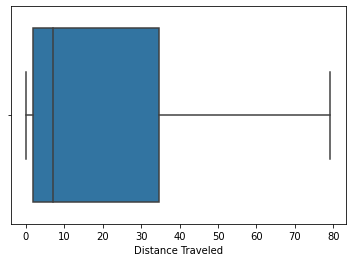

In [24]:
sns.boxplot(x=Bike_2019_clean['Distance Traveled'])

<AxesSubplot:xlabel='Distance Traveled'>

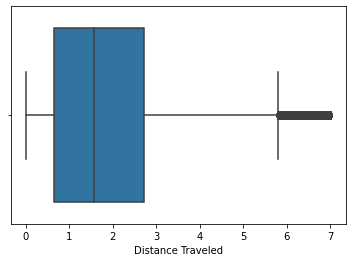

In [25]:
sns.boxplot(x=Bike_2020_clean['Distance Traveled'])

In [ ]:
#Bike_2019_clean

In [26]:
b_2020 =Bike_2020_clean['Month'].value_counts()

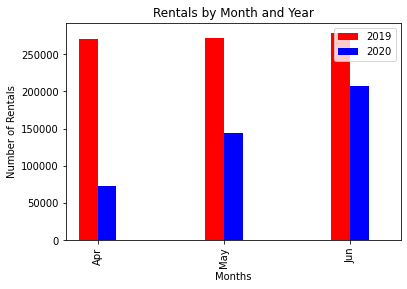

In [27]:
colors = ['#034694','#001C58','#5CBFEB']
bar_width = .15
b_2019 = Bike_2019_clean["Month"].value_counts().sort_values(ascending= True)
b_2020 =Bike_2020_clean['Month'].value_counts().sort_values(ascending=True)
#b_2019.plot(kind = 'bar', title ="Rentals by Month",fontsize=12, color = colors, position=1)
b_2019.plot(kind='bar', color='red', width=bar_width, position =1)
b_2020.plot(kind='bar', color='blue', width=bar_width, position=0)

plt.xlabel("Months")
plt.ylabel("Number of Rentals")
plt.title("Rentals by Month and Year")
plt.legend(["2019", "2020"])
plt.savefig('ridesPer_month.png', dpi=300, bbox_inches='tight')
plt.show()
#print ("Comparison of bike rentals during peak Covid-19, 2nd Quarter of 2020 compared to same period in 2019")

In [ ]:
# # NOTE: Do not change any of the code in this cell

# # Using the template add the hotel marks to the heatmap
# info_box_template = """
# <dl>
# <dt>station</dt><dd>{Start station}</dd>
# <dt>Station #</dt><dd>{end_station_id}</dd>
# </dl>
# """
# # Store the DataFrame Row
# # NOTE: be sure to update with your DataFrame name
# rentals_2020 = [info_box_template.format(**row) for index, row in Bike_2020.iterrows()]
# locations = Bike_2020[["start_lat", "start_lng"]]

In [ ]:
# # Add marker layer ontop of heat map
# layer = gmaps.marker_layer(locations, info_box_content = rentals_2020)
# fig = gmaps.figure()

# # Add the layer to the map
# fig.add_layer(layer)


# fig

In [28]:
member = Bike_2020_clean.groupby('Member type').agg('count')
member_2019 = Bike_2019_clean.groupby("Member type").agg("count")
print(member)

             ride_id  rideable_type  Start date  End date  Start station  \
Member type                                                                
casual        211439         211439      211439    211439         211427   
member        213878         213878      213878    213878         213853   

             start_station_id  End station  end_station_id  start_lat  \
Member type                                                             
casual                 211427       211428          211428     211439   
member                 213853       213853          213853     213878   

             start_lng  end_lat  end_lng  Distance Traveled  day_of_week  \
Member type                                                                
casual          211439   211439   211439             211439       211439   
member          213878   213878   213878             213878       213878   

               year  Duration   Month  
Member type                            
casual       2114

In [30]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
type_labels = member.Duration.sort_values().index 
type_counts = member.Duration.sort_values()
type_counts2 = member_2019.Duration.sort_values()
type_labels2 = member_2019.Duration.sort_values().index

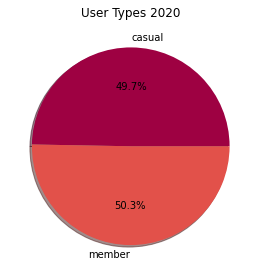

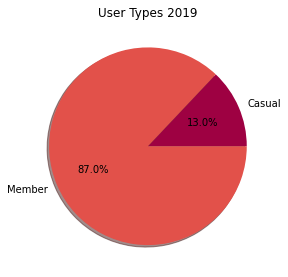

In [31]:
# print(f'During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters\
#  ({[type_counts][0][0]}) and\
#  members({[type_counts][0][1]})')
# print(f'During the second quarter of 2019 (Covid-19) bike rentals were evenly split between casual renters\
#  ({[type_counts2][0][0]}) and\
#  members({[type_counts2][0][1]})')
#print(f'({type_counts}')
plt.figure(0, figsize=(20,10)) 
the_grid = GridSpec(2,2,)
cmap = plt.get_cmap('Spectral')
color1=['#034694','#001C58']
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2020')
type_members = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2019')
type_members2 = plt.pie(type_counts2, labels = type_labels2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig('User_types19_20.png', dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:>

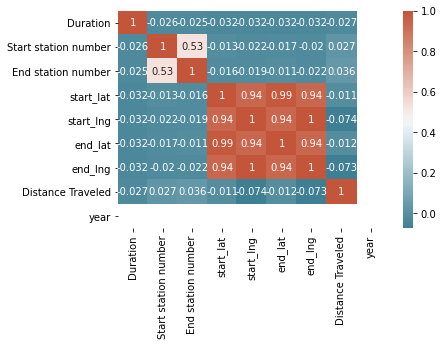

In [32]:
corr = Bike_2019_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [33]:
Bike_2019_clean["Hour"] = Bike_2019_clean["Start date"].dt.hour
Bike_2020_clean['Hour']= Bike_2020["Start date"].dt.hour

In [34]:
Bike_2020_clean.sample(10)

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,day_of_week,year,Duration,Month,Hour
251430,35B8338EACF3C2AB,docked_bike,2020-06-10 13:17:00,2020-06-10 13:26:00,4th & E St SW,182.0,4th & D St NW / Judiciary Square,145.0,38.884120,-77.017445,38.895344,-77.016106,1.253421,casual,Wednesday,2020,540,Jun,8
72984,782F724107E8DEC6,docked_bike,2020-04-07 07:48:00,2020-04-07 08:06:00,3000 Connecticut Ave NW / National Zoo,110.0,Wisconsin Ave & Brandywine St NW,463.0,38.930300,-77.055600,38.949800,-77.080200,3.037798,member,Tuesday,2020,1080,Apr,15
136974,CD9116BC9BF42157,docked_bike,2020-05-26 23:29:00,2020-05-26 23:42:00,20th & O St NW / Dupont South,150.0,Potomac & M St NW,516.0,38.908900,-77.044800,38.905400,-77.065100,1.799116,casual,Tuesday,2020,780,May,11
310004,74E650CCE2CF5B6A,docked_bike,2020-06-21 19:59:00,2020-06-21 20:59:00,16th & Harvard St NW,16.0,16th & Harvard St NW,16.0,38.926088,-77.036536,38.926088,-77.036536,0.000000,casual,Sunday,2020,3600,Jun,19
195819,263AAD181DE78606,docked_bike,2020-05-21 08:09:00,2020-05-21 08:13:00,11th & S St NW,410.0,8th & O St NW,413.0,38.913800,-77.027000,38.908600,-77.022800,0.682926,member,Thursday,2020,240,May,18
31058,3640F6B79B4C7A8B,docked_bike,2020-04-28 09:03:00,2020-04-28 09:10:00,Woodley Park Metro / Calvert St & Connecticut ...,592.0,New Hampshire Ave & T St NW,131.0,38.923400,-77.051800,38.915500,-77.038200,1.468329,casual,Tuesday,2020,420,Apr,17
39248,76A1D74A54841706,docked_bike,2020-04-05 10:22:00,2020-04-05 10:43:00,6th & K St NE,501.0,4th & M St SW,21.0,38.902900,-76.998400,38.876700,-77.017800,3.362525,member,Sunday,2020,1260,Apr,8
377510,52D2D9C532AC99D1,docked_bike,2020-06-12 15:15:00,2020-06-12 15:39:00,17th & Corcoran St NW,101.0,17th & G St NW,395.0,38.912100,-77.038700,38.898300,-77.039732,1.537127,member,Friday,2020,1440,Jun,21
28031,CFAB6095A2AF35C0,docked_bike,2020-04-11 18:27:00,2020-04-11 18:51:00,1st & M St NE,65.0,16th & R St NW,430.0,38.905700,-77.005600,38.912700,-77.036300,2.768023,member,Saturday,2020,1440,Apr,16
24045,805CED4F1B858AF3,docked_bike,2020-04-22 11:45:00,2020-04-22 11:56:00,Reservoir Rd & 38th St NW,651.0,18th & New Hampshire Ave NW,599.0,38.912600,-77.074300,38.911300,-77.041800,2.815682,member,Wednesday,2020,660,Apr,14


In [35]:
Bike_2020_clean= Bike_2020_clean.drop(Bike_2020_clean[Bike_2020_clean.Duration>86000].index)


In [36]:
Bike_2020_clean['Duration'].sort_values(ascending=False)
Bike_2020_clean

,ride_id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,day_of_week,year,Duration,Month,Hour
0,495C10604A58ACA9,docked_bike,2020-04-27 10:33:00,2020-04-27 10:53:00,4th & M St SW,21.0,New York Ave & 15th St NW,124.0,38.876700,-77.017800,38.899000,-77.033400,2.823419,member,Monday,2020,1200,Apr,10
1,08A5138C88D182A5,docked_bike,2020-04-27 11:20:00,2020-04-27 11:42:00,17th & K St NW,100.0,4th & M St SW,21.0,38.902800,-77.038600,38.876700,-77.017800,3.415186,member,Monday,2020,1320,Apr,11
2,505E308BDCA9C792,docked_bike,2020-04-27 09:45:00,2020-04-27 09:54:00,1st & M St SE,578.0,4th & M St SW,21.0,38.876900,-77.006100,38.876700,-77.017800,1.013054,member,Monday,2020,540,Apr,9
3,D3436FC6CCF04110,docked_bike,2020-04-14 13:16:00,2020-04-14 13:28:00,11th & Kenyon St NW,15.0,Thomas Circle,178.0,38.929500,-77.027800,38.905900,-77.032500,2.655516,casual,Tuesday,2020,720,Apr,13
4,37B8457C89257BD5,docked_bike,2020-04-19 20:42:00,2020-04-19 20:51:00,13th & H St NE,97.0,Eastern Market / 7th & North Carolina Ave SE,96.0,38.900400,-76.988300,38.887000,-76.996800,1.661711,member,Sunday,2020,540,Apr,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425312,D99990073F563102,docked_bike,2020-06-29 10:00:00,2020-06-29 10:52:00,Gravelly Point,230.0,Henry Bacon Dr & Lincoln Memorial Circle NW,452.0,38.865029,-77.039511,38.890544,-77.049379,2.962943,member,Monday,2020,3120,Jun,11
425313,58D09B25F2855753,docked_bike,2020-06-15 11:32:00,2020-06-15 11:42:00,4th & D St NW / Judiciary Square,145.0,15th & L St NW,394.0,38.895344,-77.016106,38.903660,-77.034846,1.866817,member,Monday,2020,600,Jun,16
425314,93D83692B0CDD8F4,docked_bike,2020-06-04 09:46:00,2020-06-04 10:02:00,Gravelly Point,230.0,Henry Bacon Dr & Lincoln Memorial Circle NW,452.0,38.865029,-77.039511,38.890544,-77.049379,2.962943,member,Thursday,2020,960,Jun,9
425315,E6D250776A6F0276,docked_bike,2020-06-04 09:20:00,2020-06-04 09:43:00,Jefferson Memorial,187.0,Gravelly Point,230.0,38.879819,-77.037413,38.865029,-77.039511,1.654572,member,Thursday,2020,1380,Jun,18


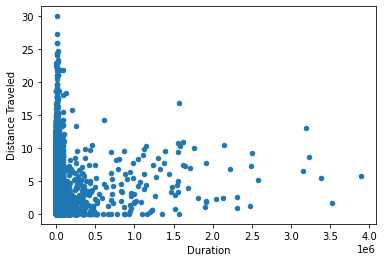

In [37]:
Bike_2020.plot(kind='scatter', x='Duration', y='Distance Traveled')
#Bike_2019_merged.plot(kind='scatter', x='Duration', y='Distance Traveled')
plt.show()

In [38]:
path = "/Users/germanportes/Documents/GW_Bootcamp/Project/Group-Project_team3/Resources/Q2 2019"
path

'/Users/germanportes/Documents/GW_Bootcamp/Project/Group-Project_team3/Resources/Q2 2019'

In [ ]:
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#bikeshare= pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#bikeshare.to_csv( "Q2_2019_df.csv", index=False, encoding='utf-8')

In [85]:
# created trip ID column IOT create unique field to determine ridership habits by day and time.

Bike_2019_clean['Id']=range(2401, 2401+len(Bike_2019_clean))

#Bike_2019_clean['Id']=Bike_2019_clean.apply(lambda x: '{0}-{1}'.format(int(x['Start station number']), int(x['End station number'])), axis=1)

In [86]:
Bike_2019_clean.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month,Hour,Id
547844,1602,2019-05-27 20:24:00,2019-05-27 20:51:00,31222,New York Ave & 15th St NW,31241,Thomas Circle,W20186,Member,39.330319,-77.613844,38.905366,-77.032154,Monday,68.93,2019,May,20,550245
85395,1312,2019-05-25 10:23:00,2019-05-25 10:45:00,31113,Columbia Rd & Belmont St NW,31314,34th & Water St NW,W21466,Casual,38.927522,-77.032517,38.909869,-77.067869,Saturday,3.63,2019,May,10,87796
660340,1754,2019-04-23 21:51:00,2019-04-23 22:20:00,31650,1st & M St SE,31126,11th & Girard St NW,W20559,Member,38.964195,-77.502419,38.808228,-77.263504,Tuesday,26.99,2019,Apr,21,662741
456213,556,2019-05-01 08:42:00,2019-05-01 08:51:00,31248,Smithsonian-National Mall / Jefferson Dr & 12t...,31292,22nd St & Constitution Ave NW,W22671,Member,38.888786,-77.026023,38.848909,-77.088252,Wednesday,6.98,2019,May,8,458614
124723,410,2019-06-26 18:57:00,2019-06-26 19:04:00,31270,8th & D St NW,31633,Independence Ave & L'Enfant Plaza SW/DOE,W21545,Member,38.866991,-77.080813,38.887568,-77.029503,Wednesday,5.00,2019,Jun,18,127124


In [88]:
Bike_2019_clean['Id'].nunique()

820836

In [89]:
Bike_2020_clean.rename({'ride_id': 'Id'}, axis=1, inplace=True)

Text(0.5, 0, 'Hours in military time')

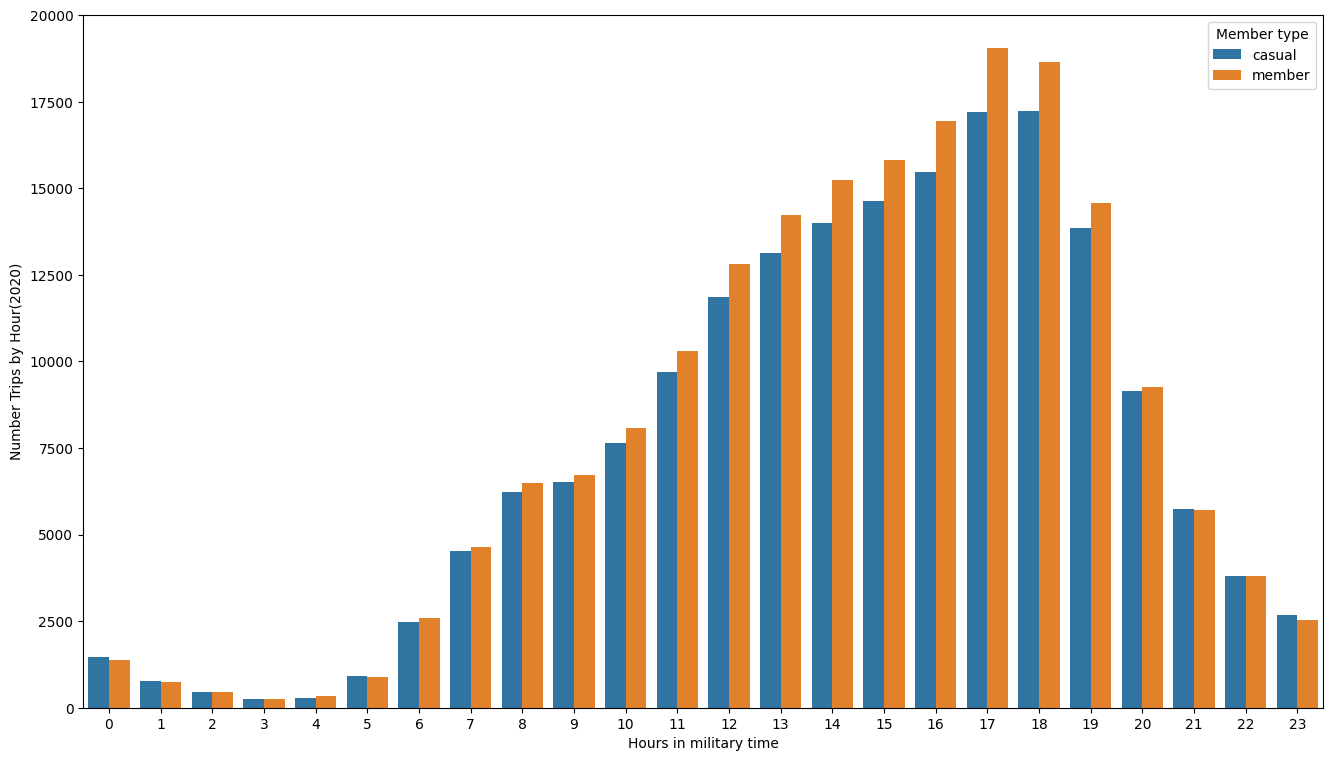

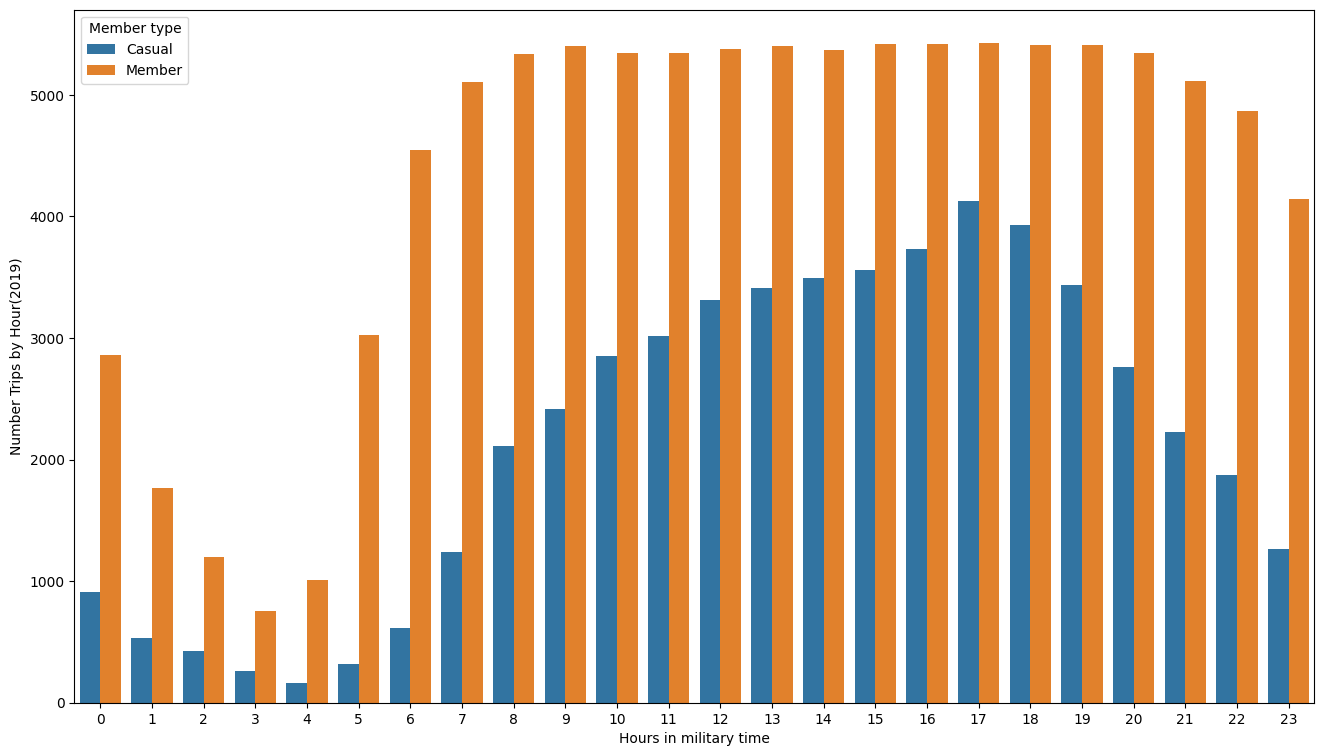

In [90]:
hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use, ax=ax)
ax.set_ylabel("Number Trips by Hour(2020)")
ax.set_xlabel("Hours in military time")

hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use19, ax=ax)
ax.set_ylabel("Number Trips by Hour(2019)")
ax.set_xlabel("Hours in military time")

Text(0.5, 0, 'Days of the week')

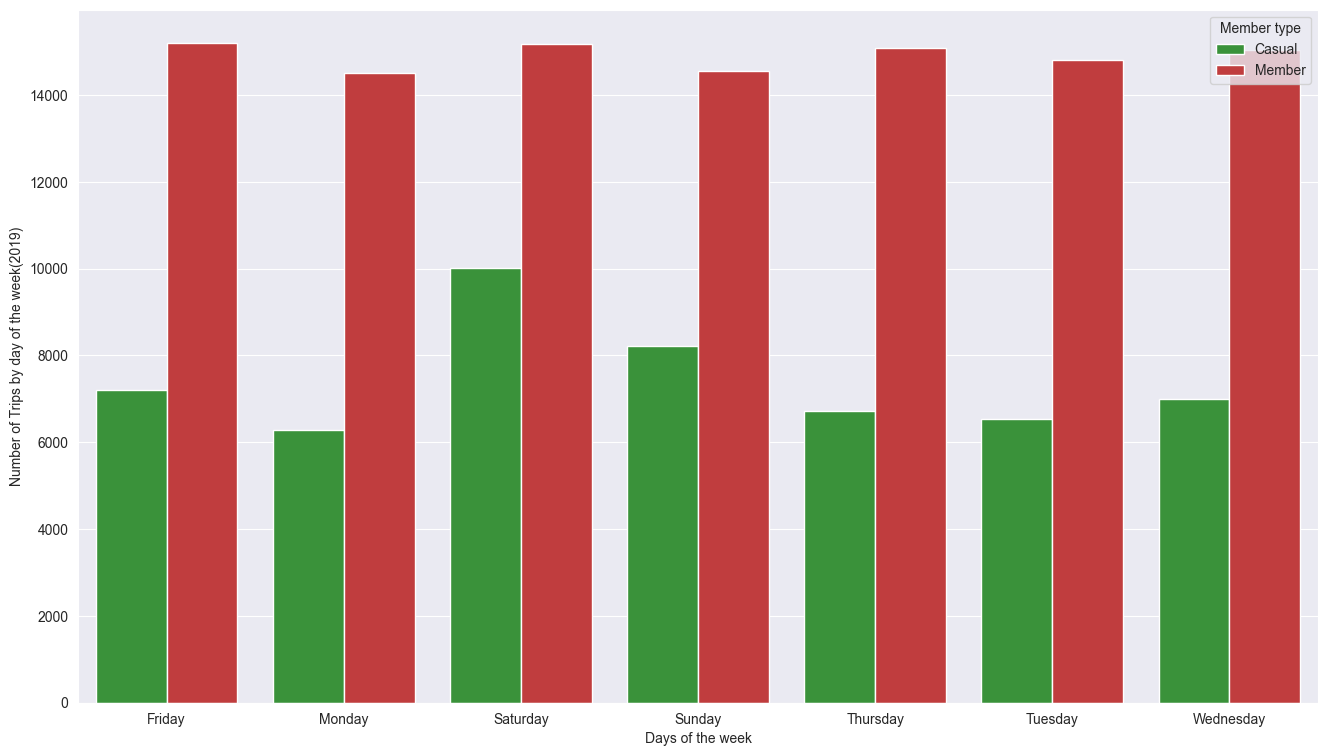

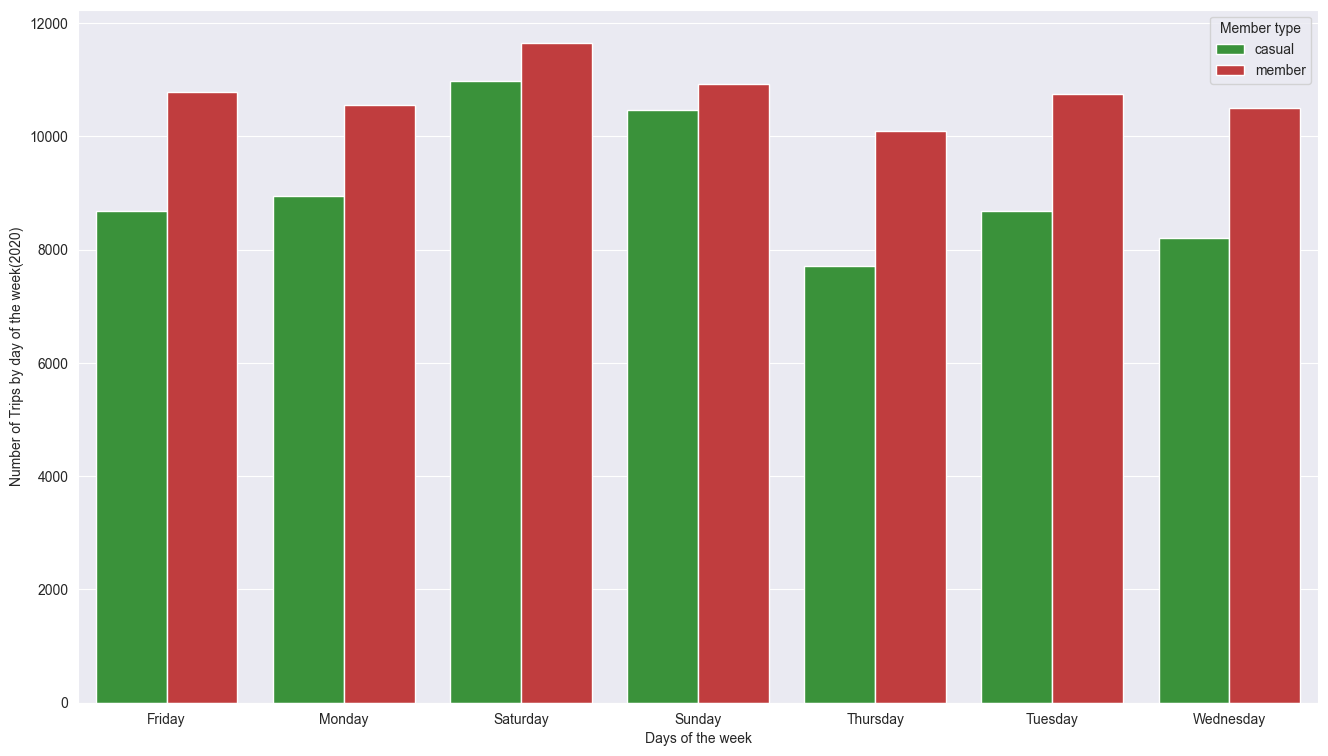

In [68]:
sns.set_style('darkgrid')
unique = hour_use19["Member type"].append(hour_use["Member type"]).unique()
unique1 = hour_use["Member type"].append(hour_use19["Member type"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette1 = dict(zip(unique1, sns.color_palette()))
palette.update({"Total":"k"})
hour_use19 =Bike_2019_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use19, ax=ax,ci=None, palette=palette1)
ax.set_ylabel("Number of Trips by day of the week(2019)")
ax.set_xlabel("Days of the week")
hour_use =Bike_2020_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use, ax=ax, ci=None, palette=palette)
ax.set_ylabel("Number of Trips by day of the week(2020)")
ax.set_xlabel("Days of the week")

In [69]:
#"Hinas Graph Starts Here"  

In [91]:
# Hina Graph Box Plot 

Bike_2019_clean.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month,Hour,Id
0,1276,2019-04-25 20:07:00,2019-04-25 20:29:00,31251,12th & L St NW,31630,15th & East Capitol St NE,W21234,Member,48.835128,2.435082,48.842162,2.292766,Thursday,10.44,2019,Apr,20,2401
1,976,2019-04-30 19:54:00,2019-04-30 20:10:00,31251,12th & L St NW,31630,15th & East Capitol St NE,W00847,Member,48.835128,2.435082,48.842162,2.292766,Tuesday,10.44,2019,Apr,19,2402
2,1949,2019-05-08 18:14:00,2019-05-08 18:46:00,31251,12th & L St NW,31630,15th & East Capitol St NE,W22099,Member,48.835128,2.435082,48.842162,2.292766,Wednesday,10.44,2019,May,18,2403
3,287,2019-04-09 18:30:00,2019-04-09 18:34:00,31632,15th & F St NE,31630,15th & East Capitol St NE,W00030,Casual,48.842162,2.292766,48.842162,2.292766,Tuesday,0.00,2019,Apr,18,2404
4,268,2019-04-09 18:30:00,2019-04-09 18:34:00,31632,15th & F St NE,31630,15th & East Capitol St NE,W23678,Casual,48.842162,2.292766,48.842162,2.292766,Tuesday,0.00,2019,Apr,18,2405


In [92]:
# Hina Graph Box Plot 

# Create DF to pull out Days and Hours
temp_df = Bike_2019_clean[["day_of_week", "Hour"]]
temp_df

,day_of_week,Hour
0,Thursday,20
1,Tuesday,19
2,Wednesday,18
3,Tuesday,18
4,Tuesday,18
...,...,...
820831,Saturday,22
820832,Monday,12
820833,Wednesday,22
820834,Saturday,0


In [93]:
# Hina Graph Box Plot 


# Sort each day out
Sunday = temp_df[temp_df.day_of_week == "Sunday"]
Monday = temp_df[temp_df.day_of_week == "Monday"]
Tuesday = temp_df[temp_df.day_of_week == "Tuesday"]
Wednesday = temp_df[temp_df.day_of_week == "Wednesday"]
Thursday = temp_df[temp_df.day_of_week == "Thursday"]
Friday = temp_df[temp_df.day_of_week == "Friday"]
Saturday = temp_df[temp_df.day_of_week == "Saturday"]

In [94]:
# Hina Graph Box Plot 


Saturday = temp_df[temp_df.day_of_week == "Saturday"]
Saturday

,day_of_week,Hour
14,Saturday,17
15,Saturday,17
27,Saturday,9
46,Saturday,18
50,Saturday,15
...,...,...
820822,Saturday,18
820830,Saturday,22
820831,Saturday,22
820834,Saturday,0


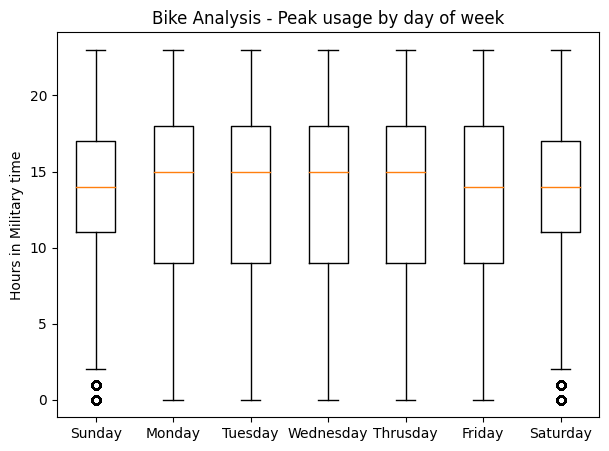

In [95]:
# Hina Graph Box Plot 


# Create and format Box Plot 

plt.style.use('default')

plt.figure(figsize=(7,5))

labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday"]
          

plt.boxplot([Sunday.Hour, Monday.Hour, Tuesday.Hour, Wednesday.Hour, Thursday.Hour, Friday.Hour, Saturday.Hour], labels=labels)

plt.title ("Bike Analysis - Peak usage by day of week")
plt.ylabel ("Hours in Military time")

plt.show()


In [96]:
Bike_2019_clean.to_csv("Bike_2019_clean.csv")
Bike_2020_clean.to_csv("Bike_2020_clean.csv")